In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [3]:
data = pd.read_csv('F:/Uber.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Check Missing Values
To check missing values we using isnull() function (returns ** boolean values ** ) & using any() function  to check whether is null value present in any column

In [5]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [12]:
data.isnull().sum() # count total number of misssing values in columns

START_DATE*    0
END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
MILES*         0
PURPOSE*       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
# Handling Missing Values by reassigning NaN values to 'Not assigned'
data['PURPOSE*'] = data['PURPOSE*'].fillna('Not assigned')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Not assigned
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
data = data.dropna()
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [19]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [21]:
import warnings
warnings.filterwarnings('ignore')

data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [23]:
data.dtypes
data.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not assigned
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [25]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAY_OF_WEEK'] = dayofweek
data['MONTH'] = month
data['WEEK_DAY'] = weekday

In [26]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEK_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not assigned,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday


In [29]:
# check what are the categories we have
data['CATEGORY*'].value_counts()

CATEGORY*
Business    1078
Personal      77
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

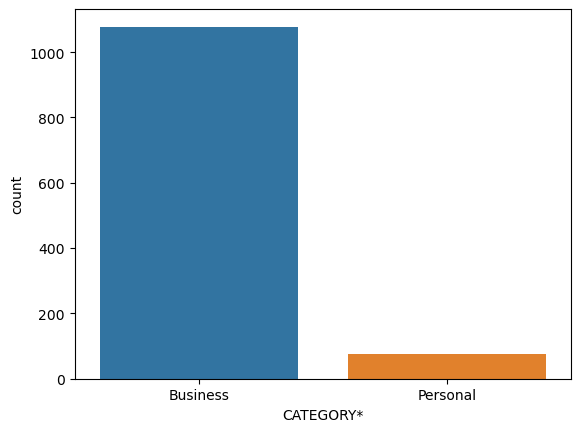

In [30]:
#Lets view categories with visualization
sns.countplot(x = 'CATEGORY*', data = data)

<Axes: ylabel='Frequency'>

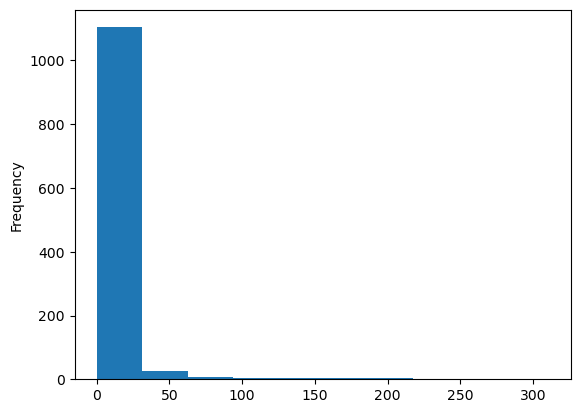

In [31]:
# lets check how long people travel with uber
data['MILES*'].plot.hist()

# Key Insignts
Most of the people Book uber to travel within  0 to 50 miles 
People use uber for travel shorter distance as compared to long

Text(0.5, 1.0, 'Number of trips Vs Hours')

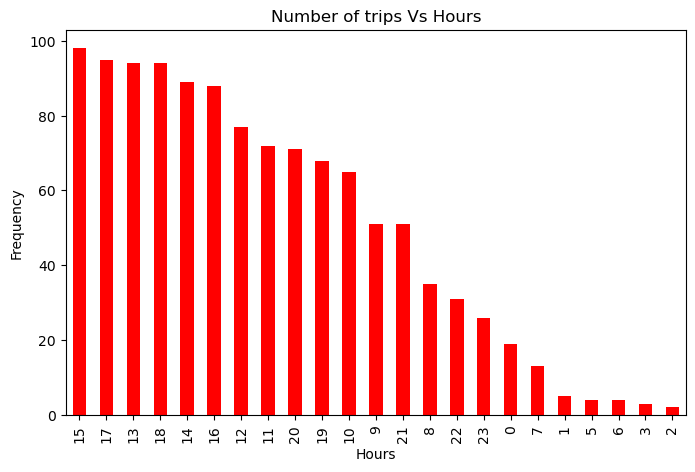

In [37]:
# Check What hour do most people take uber to their destination
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar', color = 'red', figsize = (8,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs Hours')

# Key Insights 
1. Most People book uber in afternoon section 12pm to 6 pm
2. People travel with uber less in night as compared to afternoon 

Text(0.5, 1.0, 'Purpose of Travel')

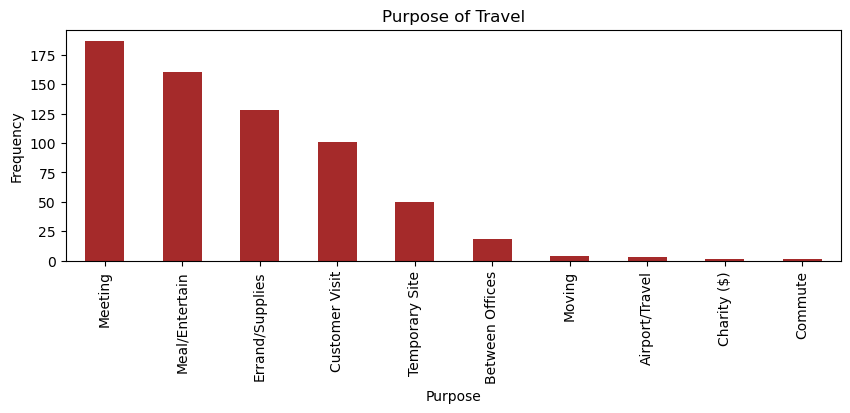

In [55]:
# Lets check the what is the traveling purpose of the customers
purpose = data['PURPOSE*'].drop(data[data['PURPOSE*'] == "Not assigned"].index)
purpose.value_counts().plot(kind = 'bar', color = 'brown', figsize = (10,3))
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Purpose of Travel')

Text(0.5, 1.0, 'Number of Trips in a Day')

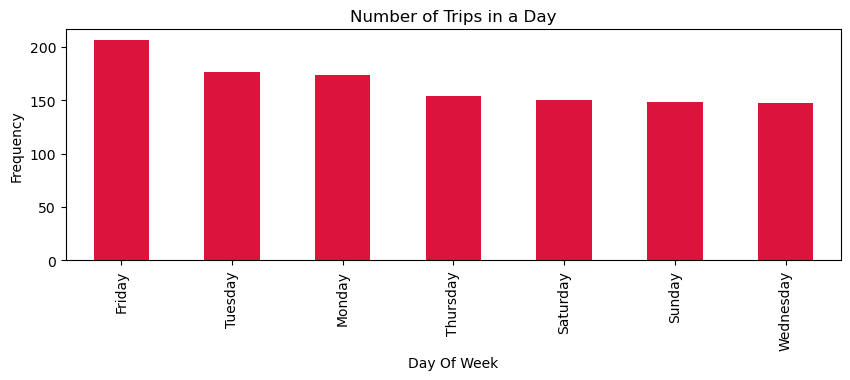

In [59]:
# Lets check Which day of week is highes number of trips 
data['WEEK_DAY'].value_counts().plot(kind = 'bar', color = 'crimson', figsize = (10,3))
plt.xlabel('Day Of Week')
plt.ylabel('Frequency')
plt.title('Number of Trips in a Day')

<Axes: xlabel='DAY'>

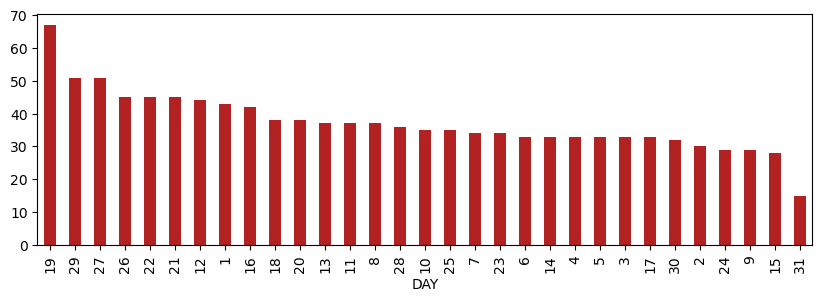

In [62]:
# Lets Check the total number of trips in each day.
data['DAY'].value_counts().plot(kind = 'bar', color = 'firebrick', figsize = (10,3))

<Axes: xlabel='MONTH'>

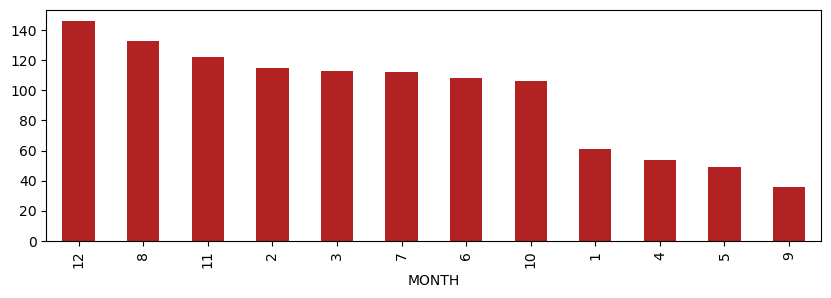

In [65]:
#Lets check the Total Number of Trips in each month
data['MONTH'].value_counts().plot(kind = 'bar', color = 'firebrick', figsize = (10,3))

<Axes: xlabel='START*'>

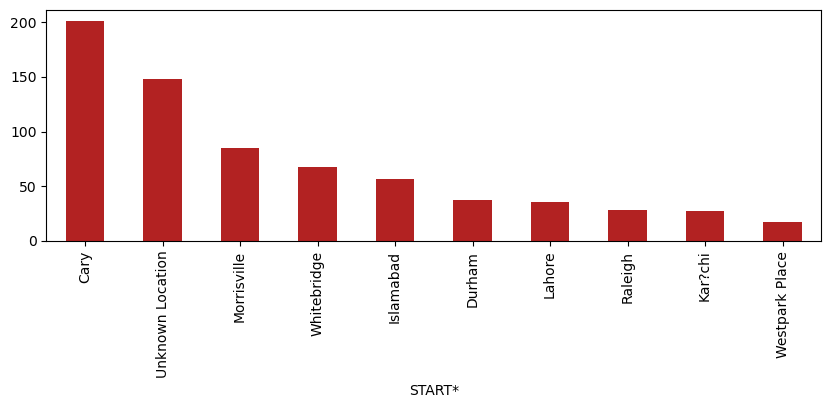

In [89]:
# lets find out top 10 places where people start travel from
data['START*'].value_counts()[:10].plot(kind = 'bar', color = 'firebrick', figsize = (10,3))

<Axes: xlabel='START*'>

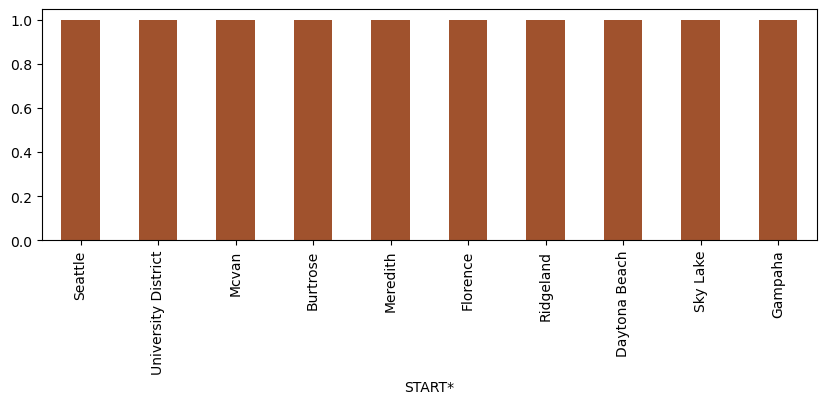

In [96]:
# lets find out least 10 places where people start travel from

data['START*'].value_counts()[-10:].plot(kind = 'bar', color = 'sienna', figsize = (10,3))